### https://www.kaggle.com/chadalee/text-analytics-on-russian-troll-tweets-part-1

#### Dataset--->> https://www.kaggle.com/fivethirtyeight/russian-troll-tweets

### Problem Statements :--

    1..What are the most trending hashtags?
    2..When were people most tweeting? Are tweets spiking around the time of major events? - Common sense tells me Yes
    3..Which users mention which users? Can a graph be made to see which are the most mentioned users?
    

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
troll=pd.read_csv(r'F:\Data Analysis_projects\Russian_tweets\Updated_Data/tweets_updated1.csv')

In [320]:
troll.shape

(203482, 17)

### lets analyse the text of Users

In [321]:
troll.head(2)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_str_date
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10


In [322]:
troll['text'].isnull().sum()

21

In [323]:
troll.dropna(subset=['text'],inplace=True)

In [324]:
troll['text'].isnull().sum()

0

In [325]:
troll['text'][10]

"RT @ElPenguinito: #myfarewellwordswouldbe I've buried my fortune in the park under a giant..."

In [326]:
troll['text'].head(10)

0    #IslamKills Are you trying to say that there w...
1    Clinton: Trump should’ve apologized more, atta...
2    RT @ltapoll: Who was/is the best president of ...
3    RT @jww372: I don't have to guess your religio...
4    RT @Shareblue: Pence and his lawyers decided w...
5                               @ModicaGiunta me, too!
6    RT @MDBlanchfield: You’ll never guess who twee...
7    RT @100PercFEDUP: New post: WATCH: DIAMOND AND...
8    RT @AriaWilsonGOP: 3 Women Face Charges After ...
9    One of the ways to remind that #BlackLivesMatt...
Name: text, dtype: object

In [327]:
####  A regular expression (or RE) specifies a set of strings that matches it

The table above shows that -

    1.Retweets begin with the keyword 'RT'. These are followed by @userkey.
    2.Hashtags begin with a # and are one continuous string with a space next to them!
    3.Links begin with https:// or http:// and can be present anywhere in the string.
    4.There can be multiple links and hashtags in a tweet, but retweet identifier is just one.
    5.User mentions begin with '@' and are a continuous word!

### ways to clean it..
    1..remove the RT mentions from tweets
    2..Remove hyperlink from data
    3..remove hashtag in data
    4..Remove user-mentions

# a...First let's remove the RT mentions from tweets

In [328]:
### ways to do it...

### 1.remove the RT mentions from tweets using substitute ie.. re.sub()
### 2.remove the RT mentions from tweetsusing findall function of re 

### 1.remove the RT mentions from tweets using substitute ie.. re.sub()

In [329]:
## find those text where we have RT Mentions
troll['text'].str.contains('RT')

0         False
1         False
2          True
3          True
4          True
          ...  
203477     True
203478     True
203479     True
203480    False
203481     True
Name: text, Length: 203461, dtype: bool

In [330]:
troll['text'][4]

'RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711'

In [331]:
import re
text=re.sub('RT.*?:','',troll['text'][4])
text

' Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711'

In [332]:
## re.match-->>it returns a Match object or it returms None if no match was found.
## re.match() only works if the match is found at the beginning of the string. 

obj=re.match('.*',text)

In [333]:
obj

<re.Match object; span=(0, 81), match=' Pence and his lawyers decided which of his offic>

In [334]:
obj.group()

' Pence and his lawyers decided which of his official emails the public could see\r'

In [335]:
obj.group().strip()

###  using strip(),we can remove spaces at the beginning and at the end of the string

'Pence and his lawyers decided which of his official emails the public could see'

In [336]:
### lets try to automate it..

In [337]:
# define a function that takes a tweet and remove RT from tweet.
def remove_unnecesaary(tweet):
    '''Given a tweet, remove the retweet element from it'''
    text=re.sub('RT.*?:','',tweet)
    obj=re.match('.*',text)
    return obj.group(0).strip()
    


In [338]:
remove_unnecesaary(troll['text'][4])

'Pence and his lawyers decided which of his official emails the public could see'

### 2.remove the RT mentions from tweetsusing findall function of re 

##### Alternative of above one which is a smarter approach using findall function

In [339]:
### practical use-case 
string='pet:I love cats'
re.findall("^pet:(.*)",string)

##^-beginning of a string
## (.*) means we just want this particular group () & I want to exclude ^pet:

['I love cats']

In [340]:
'''

.*--> will match any character (including newlines if dotall is used). This is greedy: it matches as much as it can.

(.*)-->will add that to a capture group...

(.*?)-->? makes the .* non-greedy,matching as little as it can  ,and the parenthesis makes it a capture group as well.

'''

'\n\n.*--> will match any character (including newlines if dotall is used). This is greedy: it matches as much as it can.\n\n(.*)-->will add that to a capture group...\n\n(.*?)-->? makes the .* non-greedy,matching as little as it can  ,and the parenthesis makes it a capture group as well.\n\n'

In [341]:
troll['text'][4]

'RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see\r\n\r\nhttps://t.co/HjhPguBK1Y by @alisonrose711'

In [342]:
re.findall("^RT.*?:", troll['text'][4])


### re.findall-->> which returns the list of strings that match the pattern. 

['RT @Shareblue:']

In [343]:
import re
re.findall("^RT.*?:(.*)", troll['text'][4])

## it matches as much as it can.
## (.*) means we just want this particular group () & I want to exclude ^RT.*?:..

[' Pence and his lawyers decided which of his official emails the public could see\r']

In [344]:
troll['text'][5]

'@ModicaGiunta me, too!'

In [345]:
## but if pattern (^RT.*?:) is no more available  , it returns blank
troll['text'][5]

'@ModicaGiunta me, too!'

In [346]:
re.findall("^RT.*?:(.*)", troll['text'][5])

[]

In [347]:
# define a function that takes a tweet and remove RT from tweet.

def remove_retweet(tweet):
    '''Given a tweet, remove the retweet element from it'''
    text_only = []
    if len(re.findall("^RT.*?:(.*)", tweet)) > 0:
        text_only.append(re.findall("^RT.*?:(.*)", tweet)[0])
    else:
        text_only.append(tweet)
    return text_only[0]

## to avoid data in the form of list  , access data using index as [0]
## ie bcz we dont want as [' Pence and his lawyers decided which of his official emails the public could see\r']
## we want as ' Pence and his lawyers decided which of his official emails the public could see\r'

In [348]:
remove_retweet(troll['text'][4])

' Pence and his lawyers decided which of his official emails the public could see\r'

In [349]:
# extract texts and place in a list
text_only = troll['text'].apply(remove_retweet)

In [350]:
text_only

0         #IslamKills Are you trying to say that there w...
1         Clinton: Trump should’ve apologized more, atta...
2          Who was/is the best president of the past 25 ...
3          I don't have to guess your religion! #Christm...
4          Pence and his lawyers decided which of his of...
                                ...                        
203477     In intel circles, the story goes FSB filmed T...
203478     Tonganoxie police: Middle school girl sexuall...
203479     Getting the right #company logo: How #busines...
203480    The Latest: Obama affirms continuity of ties w...
203481     U cant just Upload a CD online &amp; thats it...
Name: text, Length: 203461, dtype: object

# b..Next, let's remove the links from these tweet texts so that we have a column for just the tweet text devoid of any links and RT mentions.

In [351]:
## ways to do it--

# remove the links using re.sub() , just define some pattern to remove links
# # remove the links using re.findall() , just define some pattern to remove links


# ways to define pattern to remove links (not a part of this use-case..)
# 1..having anchor tag in data(Your assignment) ie <a>

# 2..without having anchor tag in data 
    # Mutiple patterns can be possible to remove links...
    


In [352]:
'''

  The <a> tag is that tag defines a hyperlink, which is used to link from one page to another.
    So whatever website or hyperlink u have seen , most of that is typically written inside anchor tag...
    Of-course this is a part of web development , so we will not go in-depth of its...as it is totally out of context...

'''

'\n\n  The <a> tag is that tag defines a hyperlink, which is used to link from one page to another.\n    So whatever website or hyperlink u have seen , most of that is typically written inside anchor tag...\n    Of-course this is a part of web development , so we will not go in-depth of its...as it is totally out of context...\n\n'

In [353]:
## find those rows where we can have http as a sub_string..
text_only.str.contains('http')

0         False
1          True
2         False
3         False
4         False
          ...  
203477    False
203478    False
203479     True
203480     True
203481    False
Name: text, Length: 203461, dtype: bool

In [354]:
## find those rows where we can have http as a sub_string..
text_only[text_only.str.contains('http')]

1         Clinton: Trump should’ve apologized more, atta...
6          You’ll never guess who tweeted something fals...
7          New post: WATCH: DIAMOND AND SILK Rip On John...
8          3 Women Face Charges After Being Caught Steal...
13        Dave Chappelle: "Black Lives Matter" is the wo...
                                ...                        
203473     Theresa A. Dear's "Let's Get to Work" @WVON16...
203474     This 22-year-old got out of an awkward convo ...
203475     #tcot #news #variety New Facebook tool allows...
203479     Getting the right #company logo: How #busines...
203480    The Latest: Obama affirms continuity of ties w...
Name: text, Length: 101960, dtype: object

In [355]:
# 1..having anchor tag in data

In [356]:
## your assignment task

### suppose if we have text data & inside text data , suppose my links are represented using anchor tags..
## like <a href='http:' </a> then in such cases , we have to use below pattern to remove all these HTML tags



In [ ]:
'''
<.*?>----->   means  


<--opening of HTML tags 
.-any character , 
*-0 or more characters ,
? - 0 or 1 ie either set of characters will be available or not
>-Closing of html tags

'''

In [357]:
# 2..without having anchor tag in data 

In [358]:
### lets define a pattern to remove link

In [359]:
text_only[text_only.str.contains('<a')]

### it means we do not have any anchor tag in data..

Series([], Name: text, dtype: object)

In [360]:
text_only[1]

'Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ'

In [361]:
re.sub('http.*','',text_only[1])

'Clinton: Trump should’ve apologized more, attacked less '

In [362]:
## below pattern is much much better than above one !

In [363]:
re.sub('http.?:.*','',text_only[1])

'Clinton: Trump should’ve apologized more, attacked less '

'http.?:.*

http-string starts with http
.-any character except newline..
?-after http we can have ay character or may be no any character except new_line.
:-we have character as :
.-we can have any character except than new line..
*-0 or more occurence of any character except new line

In [364]:
def remove_links(tweet):
    return re.sub('http.?:.*','',tweet)

In [365]:
text_no_links = text_only.apply(remove_links)

## text_no_links = text_only.map(remove_links)

In [366]:
### lets define another patterns to remove it...

In [367]:
pattern='https://[^\s]+'

In [368]:
'''
[] =it is metacharacter ie ([] this holds set of characters)
^ = match start of a string
\s = white-space character ie it includes(tab,space,newline etc.)
+ = (modifier) matches 1 or more occurences

'''

'\n[] =it is metacharacter ie ([] this holds set of characters)\n^ = match start of a string\n\\s = white-space character ie it includes(tab,space,newline etc.)\n+ = (modifier) matches 1 or more occurences\n\n'

In [369]:
text_only[1]

'Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ'

In [370]:
re.sub(pattern,'',text_only[1])

'Clinton: Trump should’ve apologized more, attacked less '

In [371]:
def remove_links(tweet):
    ##Provide a tweet and remove the links from it
    text_only = []
    if len(re.findall("(https://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(https://[^\s]+)", "", tweet)  
        text_only.append(tweet)
        
    else:
        text_only.append(tweet)
    return text_only[0]

In [372]:
remove_links(text_only[1])

## text_no_links = text_only.map(remove_links)

'Clinton: Trump should’ve apologized more, attacked less '

In [373]:
text_no_links[1]

'Clinton: Trump should’ve apologized more, attacked less '

In [374]:
text_no_links.head()

0    #IslamKills Are you trying to say that there w...
1    Clinton: Trump should’ve apologized more, atta...
2     Who was/is the best president of the past 25 ...
3     I don't have to guess your religion! #Christm...
4     Pence and his lawyers decided which of his of...
Name: text, dtype: object

# c.. Lets remove hashtags from these!

In [375]:
### finding those texts in which we have hashtags
text_no_links.str.contains('#')

0          True
1         False
2         False
3          True
4         False
          ...  
203477    False
203478     True
203479     True
203480    False
203481    False
Name: text, Length: 203461, dtype: bool

In [376]:
text_no_links[0]

'#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?'

In [377]:
#\S-except space,tab,newline , vertical tab character (ie white space character)
#+- having 1 or more occurence of characters
re.sub('#\S+','',text_no_links[0])


' Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?'

In [378]:
text_no_links[3]

" I don't have to guess your religion! #ChristmasAftermath"

In [379]:
re.sub('#\S+','',text_no_links[3])

" I don't have to guess your religion! "

In [380]:
def remove_hashtags(tweet):
    return re.sub('#\S+','',tweet)

In [381]:
text_no_hashtag = text_no_links.map(remove_hashtags)

# d.. Lets remove the user mentions from the text_

In [382]:
text_no_hashtag.str.contains('@')

0         False
1         False
2         False
3         False
4         False
          ...  
203477    False
203478    False
203479     True
203480    False
203481    False
Name: text, Length: 203461, dtype: bool

In [383]:
text_no_hashtag[203479]

' Getting the right  logo: How  got their message across @smallbusinessuk '

In [384]:

re.sub('@\S+','',text_no_hashtag[203479])


#\S- except space,tab,newline (white space)
#+- having 1 or more occurence of characters

# '@\S+'- @ (means string will begin from @ ) , then \S means (we have any character except than (space,tab,newline))
#  & then + (we have 1 or more occurences of any character except than (space,tab,newline))..

' Getting the right  logo: How  got their message across  '

In [385]:
# Now lets remove the mentions from the tweet text
def remove_mentions(tweet):
    return re.sub('@\S+','',tweet)



In [386]:
text_clean_final = text_no_hashtag.map(remove_mentions)

In [387]:
troll['tweet_text_only'] = text_clean_final

## what user-mentions are extremely used??

### Extract user-mentions to analyse text

In [388]:
### ways to do it..

# 1..using re module (ie re.findall())
# 2..using for loop along with list comprehension..
# 3..using re.sub() along with loops & list comprehension..

### 1..extract_user_mentions using re module (ie re.findall())

In [389]:
troll['text'].str.contains('@')

0         False
1         False
2          True
3          True
4          True
          ...  
203477     True
203478     True
203479     True
203480    False
203481     True
Name: text, Length: 203461, dtype: bool

In [390]:
troll['text'][2]

'RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [391]:
re.findall('@\S+',troll['text'][2])

#\S- except space,tab,newline (white space)
#+- having 1 or more occurence of characters

# '@\S+'- @ (means string will begin from @ ) , then \S means (we have any character except than (space,tab,newline))
#  & then + (we have 1 or more occurences of any character except than (space,tab,newline))..

['@ltapoll:']

In [392]:
troll['text'][2]

'RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [393]:
re.findall('@\S+',troll['text'][1])

[]

In [394]:
### now u will observe we have some rows that have no hashtags & some rows that have hashtag
### so lets define a function to handle both scenario..

In [395]:
def extract_user_mentions(tweet):
    '''Provide a tweet and extract user mentions from it'''
    user_mentions_only = []
    if len(re.findall('@\S+',tweet)) > 0:
        user_mentions_only.append(re.findall('@\S+',tweet))
    else:
        user_mentions_only.append(["0"])
    return user_mentions_only[0]


## return is user_mentions_only[0] bcz u need it in 1-D aray /list like ['@company', '@businesses']
## not in 2-D array/list like  [['@company', '@businesses']]

In [396]:
extract_user_mentions(troll['text'][2])

['@ltapoll:']

In [397]:
troll['user_mentions'] = troll['text'].apply(extract_user_mentions)

### must follow-->> https://stackoverflow.com/questions/2527892/parsing-a-tweet-to-extract-hashtags-into-an-array

### 2..extract_user_mentions using for loop along with some condition..

In [398]:
troll['text'][2]

'RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [399]:
def extract_user_mentions(text):
    return list(set(part for part in text.split() if part.startswith('@')))


In [400]:
extract_user_mentions(troll['text'][2])

['@ltapoll:']

### 3.. extract_user_mentions using re.sub() along with loops & list comprehension..

In [401]:
text=troll['text'][2]

In [402]:
text

'RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [403]:
set([re.sub(r"(\W+)$", "", j, flags = re.UNICODE) for j in set([i for i in text.split() if i.startswith("@")])])

## bcz @ is not my word character(a-z,A-Z,underscore) as it is a special symbol..so I will say I use \W to denot it..

{'@ltapoll'}

In [404]:
# ( ) - used for group the characters
# \W : matches any non-word character ie all chars except than ([A-Za-z0-9_])
#    note : word character(\w) are those which are basically alpha-numeric ie range is ([A-Za-z0-9_])

# + - having one or more occurences 
# $ - indicates the end of a string..

In [405]:
### using loops 

In [406]:
text_list=[]
text_list_hastags=[]
for i in text.split():
    if i.startswith("@"):
        text_list.append(i)
for j in set(text_list):
    text_list_hastags.append(re.sub(r"(\W+)$", "", j, flags = re.UNICODE))

In [407]:
text

'RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)'

In [408]:
set(text_list_hastags)

{'@ltapoll'}

### What hashtags are being used the most?

In [409]:
## extracting hashtags

In [410]:
# 1..using re module (ie re.findall())
# 2..using different pattern in re.findall() to extract hashtags
# 3..using for loop along with list comprehension..
# 4..using re.sub() along with loops & list comprehension..

### 1..extract hashtags using re module (ie re.findall())

In [411]:
troll['text'].str.contains('#')

0          True
1         False
2         False
3          True
4         False
          ...  
203477    False
203478     True
203479     True
203480    False
203481    False
Name: text, Length: 203461, dtype: bool

In [412]:
troll['text'][0]

'#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?'

In [413]:
re.findall('#\S+',troll['text'][0])

### re.findall('#\w+',troll['text'][0])


# \w-->> word char(a-z,A-Z,underscore)
# +-->> 1 or more occurences of character

['#IslamKills']

In [414]:
# '#\S+'- what does it mean??

#  # (means string will begin from # ) , then \S means (we have any character except than (space,tab,newline))
#  & then + quantifiers (we have 1 or more occurences of character except than (space,tab,newline))..

In [415]:
troll['text'][203479]

'RT @signsinyork: Getting the right #company logo: How #businesses got their message across @smallbusinessuk https://t.co/Fnse5GA6DC'

In [416]:
re.findall('#\S+',troll['text'][203479])

['#company', '#businesses']

In [417]:
len(re.findall('#\S+',troll['text'][203479]))

2

In [418]:

def extract_hashtags(tweet):
    '''Provide a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall('#\S+',tweet)) > 0:
        hashtags_only.append(re.findall('#\S+',tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]


## return is hashtags_only[0] bcz u need it in 1-D aray /list like ['#company', '#businesses']
## not in 2-D array/list like  [['#company', '#businesses']]

In [419]:
extract_hashtags(troll['text'][203479])

['#company', '#businesses']

In [420]:
troll['tweet_hashtags'] = troll['text'].map(extract_hashtags)

In [421]:
troll.head(2)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,created_str_date,tweet_text_only,user_mentions,tweet_hashtags
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN,2016-03-22,Are you trying to say that there were no terr...,[0],[#IslamKills]
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN,2016-10-10,"Clinton: Trump should’ve apologized more, atta...",[0],[0]


### 2..extract hashtags using different pattern in re.findall() to extract hashtags

In [422]:
troll['text'][0]

'#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?'

In [423]:
re.findall('[^#\s]+',troll['text'][0])



# '[^#\s]+'- what does it mean??

#   [] = it is metacharacter ie ([] this holds set of characters)
#   ^ -  beginning of a string..
#   #\s - # (means string will begin from # ) , then \s means we have space characters(ie space,tab,newline))
#   & then + quantifiers (we have 1 or more occurences of characters..


#  & then + quantifiers (we have 1 or more occurences of character except than (space,tab,newline))..

['IslamKills',
 'Are',
 'you',
 'trying',
 'to',
 'say',
 'that',
 'there',
 'were',
 'no',
 'terrorist',
 'attacks',
 'in',
 'Europe',
 'before',
 'refugees',
 'were',
 'let',
 'in?']

In [424]:
re.findall('#[^#\s]+',troll['text'][0])


# '#[^#\s]+'- what does it mean??

#   [] = it is metacharacter ie ([] this holds set of characters)
#   ^ -  beginning of a string
#   #\s - # (means string will begin from # ) , then \s means we have space characters(ie space,tab,newline))


#  & then + quantifiers (we have 1 or more occurences of character except than (space,tab,newline))..

['#IslamKills']

In [425]:
len(re.findall('#\S+',troll['text'][203479]))

2

In [426]:
'''
### alternative of above function..
def extract_hashtags(tweet):
    ##Provide a tweet and extract hashtags from it'
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]
    
 '''   

'\n### alternative of above function..\ndef extract_hashtags(tweet):\n    ##Provide a tweet and extract hashtags from it\'\n    hashtags_only = []\n    if len(re.findall("(#[^#\\s]+)", tweet)) > 0:\n        hashtags_only.append(re.findall("(#[^#\\s]+)", tweet))\n    else:\n        hashtags_only.append(["0"])\n    return hashtags_only[0]\n    \n '

### 3.. extract hashtags using for loop along with list comprehension..

In [427]:
def extract_hash_tags(text):
    return list(set(part for part in text.split() if part.startswith('#')))

In [428]:
extract_hash_tags(troll['text'][0])

['#IslamKills']

### 4.. extract hashtags using re.sub() along with loops & list comprehension..

In [429]:
text=troll['text'][0]

In [430]:
text

'#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?'

In [431]:
set([re.sub(r"(\W+)$", "", j, flags = re.UNICODE) for j in set([i for i in text.split() if i.startswith("#")])])

## bcz @ is not my word character(a-z,A-Z,underscore) as it is a special symbol..so I will say I use \W to denot it..

{'#IslamKills'}

In [432]:
# ( ) - used for group the characters
# \W : matches any non-word character ie all chars except than ([A-Za-z0-9_])
#    note : word character(\w) are those which are basically alpha-numeric ie range is ([A-Za-z0-9_])

# + - having one or more occurences 
# $ - indicates the end of a string..

In [433]:
### using loops

In [434]:
text_list=[]
text_list_hastags=[]
for i in text.split():
    if i.startswith("#"):
        text_list.append(i)
for j in set(text_list):
    text_list_hastags.append(re.sub(r"(\W+)$", "", j, flags = re.UNICODE))

In [435]:
set(text_list_hastags)

{'#IslamKills'}

### Perform Wordcloud Analysis on Tweets_hashtags to understand which are my most frequently used hashtags??

In [436]:
troll['tweet_hashtags'].head(5)

0            [#IslamKills]
1                      [0]
2                      [0]
3    [#ChristmasAftermath]
4                      [0]
Name: tweet_hashtags, dtype: object

In [437]:
### Next we need to extract all hashtags from the tweet_hashtags column and take a frequency count of those!

In [438]:
all_hashtags = troll['tweet_hashtags'].tolist()


In [439]:
type(all_hashtags)

list

In [440]:
## all_hashtags is a 2-D list(ie list of lists) , we need to convert it into 1-D list...

In [441]:

# Next we observe that our all_hashtags is a list of lists...lets change that 2-D into 1-D list as we have to create its Dataframe,
## thats why we have to convert


## ways to convert 2-D into 1-D list or Ways to flatten a 2D list --
# 1..using list comprehension
# 2..using for loop ..
# 3..using chain.iterable()
# 4..using functools.reduce
# 5..using in-built sum function.
# 6..using numpy
# 7..using lambda

##### Convert 2-D list into 1-D list-->> 
https://www.geeksforgeeks.org/python-ways-to-flatten-a-2d-list/

### 1..Convert 2-D list into 1-D list using for loop & list comprehension

In [442]:
cleaned_hashtags=[j for i in all_hashtags for j in i]

In [443]:
cleaned_hashtags[0:5]

['#IslamKills', '0', '0', '#ChristmasAftermath', '0']

### 2..Convert 2-D list into 1-D list using (for loop )..

In [444]:
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
        cleaned_hashtags.append(j)


In [445]:
cleaned_hashtags[0:12]

['#IslamKills',
 '0',
 '0',
 '#ChristmasAftermath',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlackLivesMatter',
 '#BlackPressDay',
 '#myfarewellwordswouldbe']

### 3: Convert 2-D list into 1-D list Using chain.iterable() 

In [446]:
from itertools import chain

In [447]:
flatten_list = list(chain.from_iterable(all_hashtags))

In [448]:
flatten_list[0:10]

['#IslamKills',
 '0',
 '0',
 '#ChristmasAftermath',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlackLivesMatter']

### 4..Convert 2-D list into 1-D list Using functools.reduce  

In [449]:
### lets understand reduce from basic code, ..

In [450]:
def my_add(a, b):
    result = a + b
    return result


## my_add(5, 5) gives 10


## lets do above tasks using reduce , let say add the numbers of a list..
from functools import reduce
numbers = [0, 1, 2, 3, 4]
reduce(my_add, numbers)  ### ie apply my_add function on top of numbers


### using reduce along with lambda
### ie we have some inputs as x & y , & we have to apply operations as x + y on numbers list..

reduce(lambda x , y : x + y  , numbers)

10

In [451]:
### behind the scenes
'''
0 + 1 = 1
1 + 2 = 3
3 + 3 = 6
6 + 4 = 10
'''

'\n0 + 1 = 1\n1 + 2 = 3\n3 + 3 = 6\n6 + 4 = 10\n'

In [452]:
from functools import reduce

In [453]:
all_hashtags[0:10]

[['#IslamKills'],
 ['0'],
 ['0'],
 ['#ChristmasAftermath'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['#BlackLivesMatter', '#BlackPressDay']]

In [454]:
## taking more than 5 min for entire list,  hence good to consider 10000 rows

# converting 2d list into 1d
# using functools.reduce
flatten_list = reduce(lambda z, y :z + y, all_hashtags[0:10000])


### ie we have some inputs as z & y , & we have to apply operation as z + y on top of first 10K observations of all_hashtags...

In [455]:
flatten_list

['#IslamKills',
 '0',
 '0',
 '#ChristmasAftermath',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlackLivesMatter',
 '#BlackPressDay',
 '#myfarewellwordswouldbe',
 '0',
 '0',
 '0',
 '0',
 '#My2017BiggestHope',
 '#Obama',
 '#1',
 '0',
 '0',
 '#politics',
 '0',
 '#TexasJihad',
 '#DayWithoutImmigrants',
 '#Islamisten',
 '#ISIS',
 '0',
 '#StopIslam',
 '#IslamKills',
 '0',
 '#Friyay',
 '0',
 '0',
 '0',
 '#ItsRiskyTo',
 '0',
 '#whenthestarsgoblue',
 '#RejectedDebateTopics',
 '#mutual',
 '#respect',
 '#SearchesGoogleIsAshamedOf',
 '0',
 '0',
 '#OneLetterOffSports',
 '#HashtagWars',
 '#God',
 '#religions...',
 '0',
 '#KSHBC',
 '#MAGA',
 '#SuperBowl',
 '0',
 '0',
 '0',
 '#Armageddon',
 '0',
 '#ToDoListBeforeChristmas',
 '#2017trendsreport',
 '#Excellent',
 '#RT',
 '#UrgentAction',
 '0',
 '#Merkel',
 '#Deutschland',
 '0',
 '#Palestinian',
 '#Arab',
 '#terrorist',
 '#Jerusalem',
 '#BlacksForTrump',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlacksForTrump',
 '#MakeAmericaGreatAgain',
 '#Blacks4Trump…',
 '0',
 '0

### 5: Convert 2-D list into 1-D Using in-built sum function..

In [456]:
# converting 2d list into 1d

# this is-built func will not be handy for huge data , so lets try this on subset on data..
flatten_list = sum(all_hashtags[0:100], [])


## sum(iterable, start)
## iterable : iterable can be anything list , tuples or dictionaries ,but most importantly it should be numbers. 
 
## start : this start is added to the sum of numbers in the iterable. 
#          If start is not given in the syntax , it is assumed to be 0.




### but what if iterable is list , 
### so in start,if I will mention blank list ,it means just access each & every element from iterable(all_hashtags[0:100])
##  & append it in blank list

### 6..Convert 2-D list into 1-D Using lambda 

In [457]:
flatten_list = lambda x:[y for a in x for y in flatten_list(a)] if type(x) is list else [x]

In [458]:
flatten_list(all_hashtags)

['#IslamKills',
 '0',
 '0',
 '#ChristmasAftermath',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlackLivesMatter',
 '#BlackPressDay',
 '#myfarewellwordswouldbe',
 '0',
 '0',
 '0',
 '0',
 '#My2017BiggestHope',
 '#Obama',
 '#1',
 '0',
 '0',
 '#politics',
 '0',
 '#TexasJihad',
 '#DayWithoutImmigrants',
 '#Islamisten',
 '#ISIS',
 '0',
 '#StopIslam',
 '#IslamKills',
 '0',
 '#Friyay',
 '0',
 '0',
 '0',
 '#ItsRiskyTo',
 '0',
 '#whenthestarsgoblue',
 '#RejectedDebateTopics',
 '#mutual',
 '#respect',
 '#SearchesGoogleIsAshamedOf',
 '0',
 '0',
 '#OneLetterOffSports',
 '#HashtagWars',
 '#God',
 '#religions...',
 '0',
 '#KSHBC',
 '#MAGA',
 '#SuperBowl',
 '0',
 '0',
 '0',
 '#Armageddon',
 '0',
 '#ToDoListBeforeChristmas',
 '#2017trendsreport',
 '#Excellent',
 '#RT',
 '#UrgentAction',
 '0',
 '#Merkel',
 '#Deutschland',
 '0',
 '#Palestinian',
 '#Arab',
 '#terrorist',
 '#Jerusalem',
 '#BlacksForTrump',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlacksForTrump',
 '#MakeAmericaGreatAgain',
 '#Blacks4Trump…',
 '0',
 '0

### 7.. .Convert 2-D list into 1-D Using numpy  

In [459]:
list(np.concatenate(all_hashtags).flat)

['#IslamKills',
 '0',
 '0',
 '#ChristmasAftermath',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlackLivesMatter',
 '#BlackPressDay',
 '#myfarewellwordswouldbe',
 '0',
 '0',
 '0',
 '0',
 '#My2017BiggestHope',
 '#Obama',
 '#1',
 '0',
 '0',
 '#politics',
 '0',
 '#TexasJihad',
 '#DayWithoutImmigrants',
 '#Islamisten',
 '#ISIS',
 '0',
 '#StopIslam',
 '#IslamKills',
 '0',
 '#Friyay',
 '0',
 '0',
 '0',
 '#ItsRiskyTo',
 '0',
 '#whenthestarsgoblue',
 '#RejectedDebateTopics',
 '#mutual',
 '#respect',
 '#SearchesGoogleIsAshamedOf',
 '0',
 '0',
 '#OneLetterOffSports',
 '#HashtagWars',
 '#God',
 '#religions...',
 '0',
 '#KSHBC',
 '#MAGA',
 '#SuperBowl',
 '0',
 '0',
 '0',
 '#Armageddon',
 '0',
 '#ToDoListBeforeChristmas',
 '#2017trendsreport',
 '#Excellent',
 '#RT',
 '#UrgentAction',
 '0',
 '#Merkel',
 '#Deutschland',
 '0',
 '#Palestinian',
 '#Arab',
 '#terrorist',
 '#Jerusalem',
 '#BlacksForTrump',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '#BlacksForTrump',
 '#MakeAmericaGreatAgain',
 '#Blacks4Trump…',
 '0',
 '0

In [460]:
## 1D list-->> cleaned_hashtags

In [461]:
# Convert cleaned_hashtags to a Dataframe and count the most frequent occuring
cleaned_hashtag = pd.DataFrame(cleaned_hashtags)


In [462]:
cleaned_hashtag.columns=['Hashtags']

In [463]:
hashtag_counts = cleaned_hashtag['Hashtags'].value_counts()
hashtag_counts[1:]

#politics                                                  3635
#tcot                                                      2797
#MAGA                                                      2298
#PJNET                                                     2119
#news                                                      2046
                                                           ... 
#AuraGammi                                                    1
#NaturalLaw,#Constitution,#BillofRights,#RuleofLaw&amp;       1
#vacaysofleeting                                              1
#donttalktome                                                 1
#UHCL.                                                        1
Name: Hashtags, Length: 28578, dtype: int64

In [464]:
## above technique also works for emojis analysis of youtube..

##### now lets perform Wordcloud Analysis

In [465]:
### lets try to create its wordcloud for better conclusion of Hashtags
## for wordcloud , we need our data in the form of strings

In [466]:
cleaned_hashtag.shape

(266372, 1)

In [467]:
cleaned_hashtag.head()

,Hashtags
0,#IslamKills
1,0
2,0
3,#ChristmasAftermath
4,0


In [468]:
filter_hash=(cleaned_hashtag['Hashtags']!='0')


In [469]:
hashtags=cleaned_hashtag[filter_hash]

In [470]:
hashtags.head()

,Hashtags
0,#IslamKills
3,#ChristmasAftermath
9,#BlackLivesMatter
10,#BlackPressDay
11,#myfarewellwordswouldbe


In [471]:
hashes_words = " ".join(hashtags['Hashtags'])

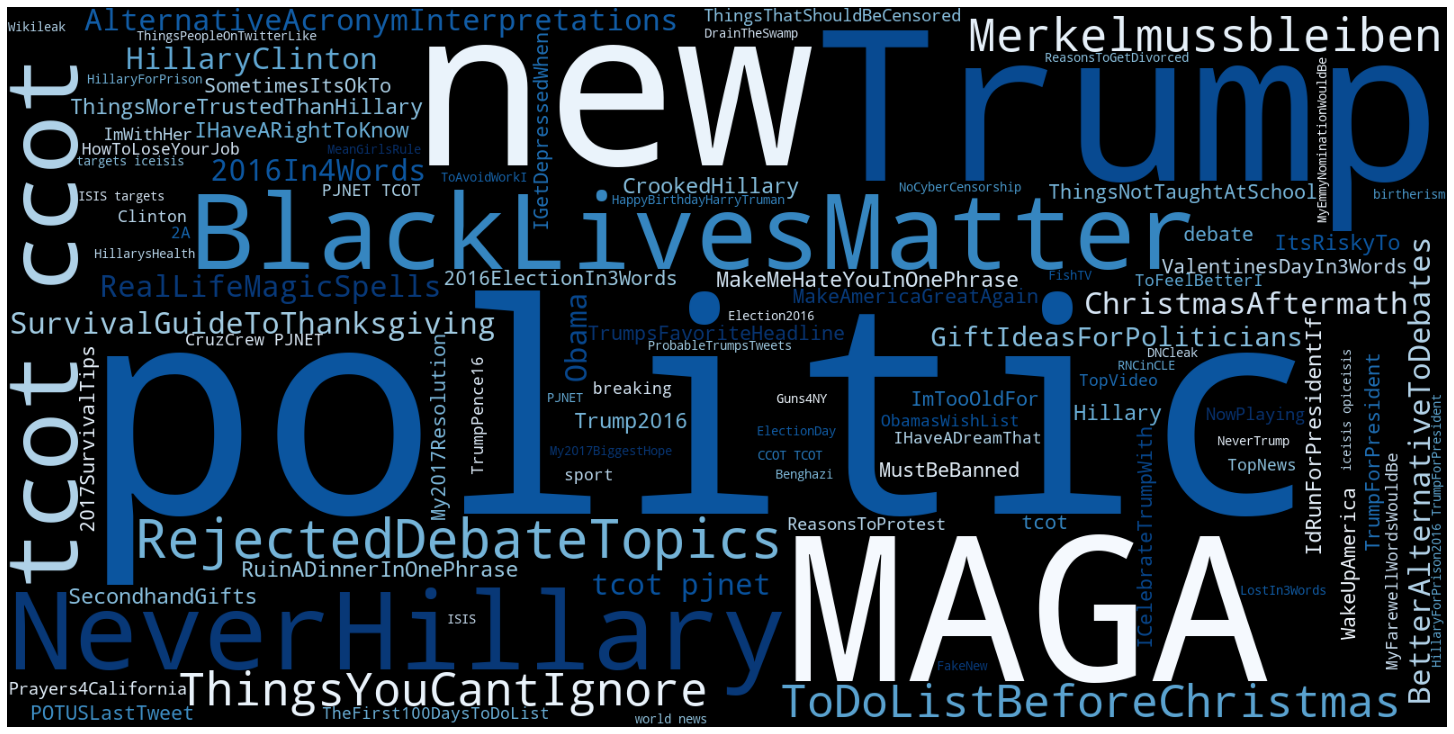

In [472]:
# generate the wordcloud. the max_words argument controls the number of words on the cloud

from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800,  
                      colormap = "Blues",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Top 10 hashtags..

<AxesSubplot:>

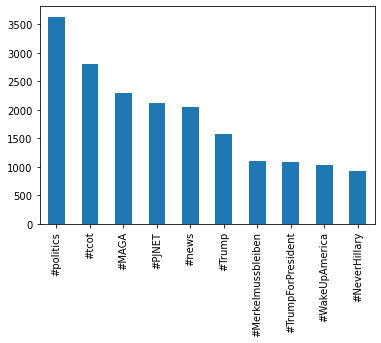

In [473]:
hashtag_counts[1:11].plot(kind='bar')

In [474]:
troll.to_csv(r'F:\Data Analysis_projects\Russian_tweets\Updated_Data/tweets_updated_2.csv',index=False)

In [478]:
hashtag_counts=hashtag_counts.reset_index()
hashtag_counts.columns=['hashtags','count']

In [479]:
hashtag_counts.to_csv(r'F:\Data Analysis_projects\Russian_tweets\Updated_Data/hashtag_counts.csv',index=False)

In [480]:
cleaned_hashtag.to_csv(r'F:\Data Analysis_projects\Russian_tweets\Updated_Data/cleaned_hashtag.csv',index=False)